In [2]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
""" Train a decision tree classifier on the data and perform 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier. """
 

# Load the data

data=pd.read_csv('creditcard.csv')

#change the class column to boolean

data['Class'] = data['Class'].astype(bool)


X = data.drop(['Class'], axis=1)
y = data['Class']

# Create a decision tree classifier
clf_best = DecisionTreeClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)
# Define the metrics to compute
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 10-fold cross-validation and compute all the scores
scores = cross_validate(clf_best , X, y, cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)

      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     3.666159    0.029561       0.997964        0.449438     0.816327   
1     3.497582    0.024516       0.998455        0.619048     0.265306   
2     3.484004    0.023623       0.999263        0.888889     0.653061   
3     3.348442    0.024475       0.999263        0.888889     0.653061   
4     3.322869    0.023967       0.999228        0.909091     0.612245   
5     3.462108    0.024208       0.998736        0.666667     0.560000   
6     3.243275    0.042754       0.999157        0.933333     0.560000   
7     3.347268    0.024057       0.999263        1.000000     0.571429   
8     3.144945    0.024049       0.999192        1.000000     0.530612   
9     3.246516    0.023667       0.999017        0.769231     0.612245   
Mean  3.376317    0.026488       0.998954        0.812459     0.583429   

       test_f1  
0     0.579710  
1     0.371429  
2     0.752941  
3     0.752941  
4     0.731707  
5     0.6

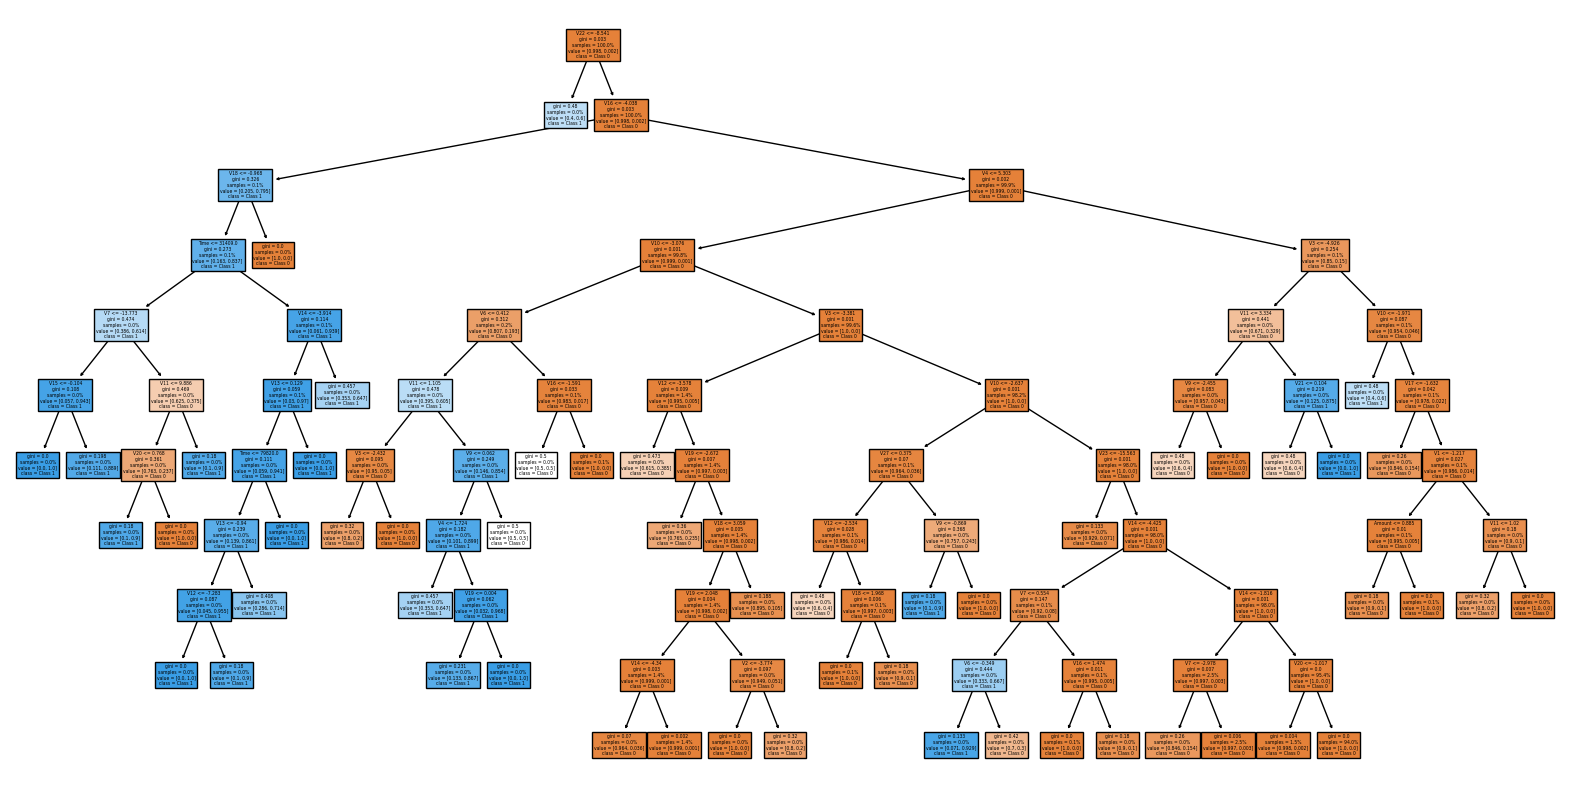

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the model to the data
clf_best.fit(X, y)

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (optional)
plot_tree(clf_best, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], proportion=True)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score:  0.9989536795474532


In [15]:
"""training a DT modele with data oversampled with random oversampling performin 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import RandomOverSampler


# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Fit the RandomOverSampler to the training data
X_resampled_Rand, y_resampled_Rand = ros.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_Rand, y_resampled_Rand , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)



      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     2.038542    0.036268       0.657352        0.599030     0.951778   
1     1.982857    0.028116       0.974043        0.984297     0.963455   
2     2.017449    0.028904       0.971827        0.990027     0.953255   
3     1.994054    0.027398       0.973093        0.993614     0.952306   
4     1.938862    0.028947       0.975995        0.986974     0.964722   
5     1.963099    0.027840       0.978193        0.976117     0.980374   
6     1.844352    0.029207       0.972636        0.975749     0.969366   
7     1.894900    0.029547       0.971704        0.975299     0.967923   
8     1.852869    0.028788       0.974096        0.977708     0.970315   
9     1.883178    0.030650       0.971036        0.970556     0.971546   
Mean  1.941016    0.029566       0.941997        0.942937     0.964504   

       test_f1  
0     0.735286  
1     0.973765  
2     0.971293  
3     0.972522  
4     0.975721  
5     0.9

In [16]:


"""training a DT modele with data oversampled with SMOTE oversampling performin 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_SMOTE, y_resampled_SMOTE , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)




      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     3.575085    0.031646       0.576878        0.542768     0.975555   
1     3.624659    0.026936       0.980462        0.983848     0.976962   
2     3.636740    0.028835       0.979934        0.985035     0.974676   
3     3.592593    0.028038       0.978264        0.992146     0.964159   
4     3.529378    0.028688       0.976874        0.978675     0.974992   
5     3.410794    0.028186       0.968292        0.974721     0.961522   
6     3.330987    0.028783       0.983451        0.989878     0.976892   
7     3.340451    0.027957       0.974078        0.986396     0.961417   
8     3.373325    0.028110       0.979020        0.987019     0.970808   
9     3.314744    0.032811       0.806359        0.728928     0.975485   
Mean  3.472876    0.028999       0.920361        0.914942     0.971247   

       test_f1  
0     0.697480  
1     0.980393  
2     0.979828  
3     0.977952  
4     0.976830  
5     0.9

In [17]:
"""training a DT modele with data oversampled with ADASYN oversampling performing 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import ADASYN

# Create a ADASYN object
adasyn = ADASYN(random_state=42)


# Fit the ADASYN object to the training data

X_resampled_ADASYN, y_resampled_ADASYN = adasyn.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_ADASYN, y_resampled_ADASYN , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)



      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     3.387168    0.031237       0.744715        0.668794     0.969574   
1     4.003577    0.027898       0.973005        0.987989     0.957650   
2     3.404911    0.027357       0.980409        0.988728     0.971896   
3     3.381082    0.033809       0.917852        0.987484     0.846424   
4     3.533403    0.032833       0.936793        0.989862     0.882620   
5     3.500487    0.030717       0.904996        0.947041     0.857967   
6     3.447463    0.028307       0.956561        0.979179     0.932958   
7     3.395990    0.029912       0.951003        0.984105     0.916813   
8     3.380517    0.028429       0.969311        0.985058     0.953078   
9     3.348748    0.027685       0.931183        0.993359     0.868167   
Mean  3.478335    0.029818       0.926583        0.951160     0.915715   

       test_f1  
0     0.791575  
1     0.972583  
2     0.980240  
3     0.911529  
4     0.933170  
5     0.9

In [18]:
"""training a DT modele with data oversampled with Borderline oversampling performing 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import BorderlineSMOTE

# Create a BorderlineSMOTE object

borderline = BorderlineSMOTE(random_state=42)


# Fit the BorderlineSMOTE object to the training data

X_resampled_borderline, y_resampled_borderline = borderline.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_borderline, y_resampled_borderline , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability


scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score

scores_df.loc['Mean'] = scores_df.mean()

# Print the scores  

print(scores_df)







      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     2.940110    0.028662       0.958936        0.927075     0.996237   
1     3.066054    0.025409       0.999050        0.999121     0.998980   
2     3.059305    0.026680       0.998804        0.999507     0.998101   
3     2.926704    0.026217       0.998312        0.999330     0.997292   
4     2.866646    0.025245       0.997186        0.996278     0.998101   
5     2.890924    0.026238       0.996360        0.994707     0.998030   
6     2.923288    0.025328       0.998892        0.999577     0.998206   
7     2.922489    0.025370       0.998277        0.999084     0.997468   
8     3.122262    0.028849       0.999367        0.999191     0.999543   
9     3.026047    0.027418       0.998874        0.998769     0.998980   
Mean  2.974383    0.026542       0.994406        0.991264     0.998094   

       test_f1  
0     0.960412  
1     0.999050  
2     0.998803  
3     0.998310  
4     0.997189  
5     0.9

In [19]:
"""training a DT modele with data oversampled with SVMSMOTE oversampling performing 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""

from imblearn.over_sampling import SVMSMOTE

# Create a SVMSMOTE object

svm_smote = SVMSMOTE(random_state=42)

# Fit the SVMSMOTE object to the training data

X_resampled_svm, y_resampled_svm = svm_smote.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_svm, y_resampled_svm , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability

scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score

scores_df.loc['Mean'] = scores_df.mean()

# Print the scores

print(scores_df)


      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     2.678553    0.028234       0.747604        0.666030     0.993247   
1     2.990834    0.026504       0.996694        0.997499     0.995885   
2     3.110302    0.026215       0.997169        0.999541     0.994794   
3     3.020220    0.025307       0.995076        0.997069     0.993071   
4     2.990604    0.024728       0.998118        0.999365     0.996870   
5     2.928254    0.026152       0.997520        0.996595     0.998452   
6     2.947186    0.025514       0.999683        0.999367     1.000000   
7     3.059705    0.024871       0.999033        0.998069     1.000000   
8     3.045913    0.024895       0.999138        0.998280     1.000000   
9     2.841371    0.024611       0.998804        0.997614     1.000000   
Mean  2.961294    0.025703       0.972884        0.964943     0.997232   

       test_f1  
0     0.797374  
1     0.996691  
2     0.997162  
3     0.995066  
4     0.998116  
5     0.9

Testing the Implemented functions 

In [1]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
""" Train a decision tree classifier on the data and perform 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier. """
 

# Load the data

data=pd.read_csv('creditcard.csv')

from Classification_Technics import DT_modele

from Classification_Technics import Test_model

Test_model(data, DT_modele(data) , "SMOTE")


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})
       fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     82.955645    0.054847       0.966692        0.938585     0.998734   
1     84.215562    0.047926       0.996782        0.994503     0.999086   
2     85.231275    0.048275       0.998030        0.996842     0.999226   
3     84.893243    0.048666       0.998241        0.997087     0.999402   
4     78.937008    0.048615       0.997767        0.996387     0.999156   
5     78.762770    0.047609       0.992948        0.986903     0.999156   
6     86.226287    0.048827       0.998681        0.997753     0.999613   
7     84.230569    0.059742       0.998400        0.997542     0.999261   
8     88.744125    0.048261       0.996289        0.993219     0.999402   
9     89.854068    0.048158       0.566643        0.535732     0.999297   
Mean  84.405055    0.050093       0.951047        0.943455     0.99

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,82.955645,0.054847,0.966692,0.938585,0.998734,0.967725
1,84.215562,0.047926,0.996782,0.994503,0.999086,0.996789
2,85.231275,0.048275,0.998030,0.996842,0.999226,0.998033
3,84.893243,0.048666,0.998241,0.997087,0.999402,0.998243
4,78.937008,0.048615,0.997767,0.996387,0.999156,0.997770
5,78.762770,0.047609,0.992948,0.986903,0.999156,0.992992
6,86.226287,0.048827,0.998681,0.997753,0.999613,0.998682
7,84.230569,0.059742,0.998400,0.997542,0.999261,0.998401
8,88.744125,0.048261,0.996289,0.993219,0.999402,0.996301
9,89.854068,0.048158,0.566643,0.535732,0.999297,0.697518


In [2]:
from grid_search import grid_search
import pandas as pd
    
data=pd.read_csv('creditcard.csv')
grid_search(data, 'svm')

KeyboardInterrupt: 

In [ ]:
#

In [12]:
import Under_Sampling_Tec

data=pd.read_csv('creditcard.csv')
data['Class'] = data['Class'].astype(bool)


data.info()
#remove null velues 

data.dropna(inplace=True)
Under_Sampling_Tec.TomekLinks(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

TypeError: TomekLinks() got an unexpected keyword argument 'sampling_strategy'